#Goal

Given two points 1 and 2, with 1 higher above the ground, what should be the shape of a potential path that makes a point moving from point 1 to point 2 in the shortest possible time?

# Setting up the problem

The time to travel from $1$ to $2$ is given by: time$(1 -> 2)$$= \int_{1}^{2} \frac{ds}{v}$

By conservation of energy we know that $v = \sqrt{2gy}$

Because this gives $v$ as a function of $y$ it is convenient to use $y$ as an independent variable. That is: the unknown $x = x(y)$

Now we can write the distance $ds$ between neighboring points on the path as:

$$ ds = \sqrt{dx^{2} + dy^{2}} = \sqrt{x'(y)^{2} + 1} dy $$

Substituting to the integral above:

$$\int_{1}^{2} \frac{ds}{v} = \int_{0}^{y_2} \frac{\sqrt{x'(y)^{2} + 1}}{\sqrt{2gy}}dy = \frac{1}{\sqrt{2g}}\int_{0}^{y_2} \frac{\sqrt{x'(y)^{2} + 1}}{\sqrt{y}}dy$$

Where our integrand is a function:

$$ f(x, x', y) = \frac{\sqrt{x'^{2} + 1}}{\sqrt{y}} $$

Now we seek the path that makes the time as small as possible so we'll find Euler-Lagrange equations handy:

$$ \frac{\partial f}{\partial x} = \frac{d}{dy}\frac{\partial f}{\partial x'} $$

Since $ \frac{\partial f}{\partial x} $ equals $0$ because $f$ does not depend on $x$ we conclude that $\frac{\partial f}{\partial x'}$ is constant.

$$ \frac{\partial f}{\partial x'} = \frac{x'}{\sqrt{x'^{2}+1}\sqrt{y}}$$

Squaring the above derivative and naming the constant $\frac{1}{2a}$  for future convenience we have:

$$ \frac{x'^2}{(x'^{2}+1)y} = constant = \frac{1}{2a} $$

Solving for $x'$:

# My solution

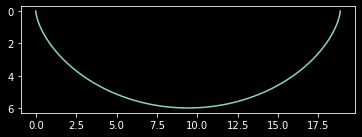

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

g = 9.81 # m/s^2 , gravitational acceleration

def brachi(a):

  theta = np.linspace(0, 2 * np.pi, 100)

  x = a*(theta - np.sin(theta))
  y = a*(1 - np.cos(theta))

  return (x, y)

brachi = brachi(3.0)

a = 3.0

fig, ax = plt.subplots(1) 
plt.style.use(['dark_background'])

#ax.set_ylim(a*(1.5 - np.cos(np.pi)), 0)
#ax.set_xlim(0, 3.5*(np.pi - np.sin(np.pi)))

plt.gca().invert_yaxis()

ax.plot(brachi[0], brachi[1])
ax.set_aspect(1)

plt.show()





In [48]:
def brachi_integrand(y):

  xprime = np.sqrt(y / (2 * a - y))

  return np.sqrt((xprime**2) + 1) / np.sqrt(2 * g * y)


I = quad(brachi_integrand, 0, 6) # Add additional arguments for function 
I


(1.7373047071821675, 3.476658960721579e-10)